# Notebook de nettoyage des données

### Sommaire :
- [A - Idée d'application](#A)
    - [A.1 - Sélection des variables intéressantes](#A.1)
- [B - Nettoyage du fichier de travail](#B)
    - [B.1 - Sélection des produits venuds en France](#B.1)
    - [B.2 - Retrait des produits non-alimentaires](#B.2)
    - [B.3 - Création d'une colonne "classe_IG"](#B.3)
    - [B.4 - Création d'une colonne "delta_jours_actu](#B.4)
    - [B.5 - Uniformisation des colonnes d'Energie](#B.5)
    - [B.6 - Retrait des produits présentant des valeurs abérantes](#B.6)
        - [B.6.a - Colonnes nutriments](#B.6.a)
        - [B.6.b - Colonnes energies](#B.6.b)
- [C - Récapitulatif du fichier "cleané"](#C)
    - [C.1 - Taille du fichier "cleané"](#C.1)
    - [C.2 - Données manquantes](#C.2)
- [D - Création du fichier de travail](#D)

## Importation des bibliothèques

In [11]:
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import seaborn as sns
import datetime

In [12]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

## Importation des données

In [13]:
data = pd.read_csv("Data\en.openfoodfacts.org.products.csv", sep='\t', low_memory=False)

In [14]:
print("Taille du fichier : ",data.shape[0]," colonnes, variables, et ",data.shape[1]," lignes, individus.")

Taille du fichier :  1722665  colonnes, variables, et  184  lignes, individus.


In [15]:
#aperçu du fichier :
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,375.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Visualisation des données manquantes des colonnes

In [16]:
def colNan(df, sort=False):
    colNull=df.isnull().sum()
    colTabNul = pd.DataFrame(colNull, columns=["Nb Null"]) 
    colTabNul["% Null"] = colTabNul["Nb Null"]/len(df)*100
    if sort==False:
        return colTabNul
    else:
        return colTabNul.sort_values(by = 'Nb Null', ascending = False)

In [17]:
colNan(data)

,Nb Null,% Null
code,0,0.000000
url,0,0.000000
creator,4,0.000232
created_t,0,0.000000
created_datetime,0,0.000000
last_modified_t,0,0.000000
last_modified_datetime,0,0.000000
product_name,77823,4.517593
abbreviated_product_name,1719629,99.823761
generic_name,1609828,93.449858


# A - Idée d'application <a name="A"></a>
## 1. Calculateur des besoins journalier en calories et en macro-nutriments
Dans un 1er temps calculer les besoins journalier en calories et en macro-nutriments
## 2. Calculateur des calories et des macro-nutriments consommés 
Une fois les les besoins journaliers en calories et en macro-nutriments calculés l'idée est de pouvoir suivre les calories et macro-nutriments consommés via les informations d'OpenFoodFact. 

## A.1 - Sélection des variables intéressantes <a name="A.1"></a>
Pour l'application je vais donc avoir besoin d'avoir des informations suivantes : 
- Informations "Générales" :
    - 'code' : le code barre d'identification des produits
    - 'last_modified_datetime' : la date et l'heure de la dernière modification
    - 'product_name' : le nom du produit
    - 'brands' : la marque du produit
    - 'countries' : la liste des pays dans lesquels le produit est en vente
    - 'countries_tags' : la liste des pays dans lesquels le produit est en vente, dans un autre Format
    - 'countries_en' : en Anglais, la liste des pays dans lesquels le produit est en vente
- Groupe d'aliments :
    - 'categories' : la liste des catégories auxquelles appartient le produit
    - 'main_category' : la catégorie principale auxquel appartient le produit
    - 'main_category_en' : en Anglais, la catégorie principale auxquel appartient le produit
    - 'pnns_groups_1' : la catégorie principale du produit selon le PNNS([Programme National Nutrition Santé](https://www.mangerbouger.fr/PNNS/Le-PNNS))
    - 'pnns_groups_2' : la catégorie secondaire du produit selon le PNNS
    - 'nova_group' : catégorie suivant le degrès de transformation du produit [Classification NOVA](https://fr.openfoodfacts.org/nova)
    - 'glycemic-index_100g' : l'index glycémique pour 100g, échelle allant de 0 à 100
- Nutriments pour 100g :
    - 'fiber_100g' : fibres pour 100g
    - 'fat_100g' : graisses ou lipides pour 100g
    - 'saturated-fat_100g' : graisses saturées pour 100g , quantité inclue dans 'fat_100g'
    - 'carbohydrates_100g' : glucides pour 100g
    - 'sugars_100g' : sucres pour 100g, quantité inclue dans 'carbohydrates_100g'
    - 'proteins_100g' : proteines pour 100g
    - 'salt_100g' : sel pour 100g
    - 'sodium_100g' : sodium pour 100g sachant que, quantité de sodium = (quantité de sel)/2,5
- Energie pour 100g :
    - 'energy-kcal_100g' : la quantité d'énergie en kcal pour 100g
    - 'energy_100g' : quantité d'énergie pour 100g, unité pas précisée 
    - 'energy-kj_100g' : quantité d'énergie en kJ pour 100g, sachant que 1 kcal = 4,1868 kJ
- Scores de nutrition :
    - 'nutriscore_score' : les points, le score, du produit [Nutriscore](https://fr.openfoodfacts.org/nutriscore)
    - 'nutriscore_grade' : la note, en fonction du score du produit. Les notes vont de A à E
    - 'nutriscore-score-fr_100g' : le score du produit, France

Au total j'ai donc sélectionné 28 variables.

In [18]:
col = ['code','last_modified_datetime','product_name','brands','countries', 'countries_tags', 'countries_en','categories',
       'main_category','main_category_en','pnns_groups_1','pnns_groups_2','nova_group','glycemic-index_100g','fiber_100g',
       'fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g','sodium_100g',
       'energy-kcal_100g','energy_100g','energy-kj_100g','nutriscore_score','nutriscore_grade','nutrition-score-fr_100g']

Création d'un dataframe de travail contenant uniquement les 28 variables sélectionnées précédement :

In [19]:
dataWork=pd.DataFrame(data, columns=col)

In [20]:
def recap(df):
    return pd.concat([df.describe(include='all'), df.dtypes.to_frame(name='type').T])

In [21]:
recap(dataWork)

,code,last_modified_datetime,product_name,brands,countries,countries_tags,countries_en,categories,main_category,main_category_en,pnns_groups_1,pnns_groups_2,nova_group,glycemic-index_100g,fiber_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy-kcal_100g,energy_100g,energy-kj_100g,nutriscore_score,nutriscore_grade,nutrition-score-fr_100g
count,1722665,1722665,1644842,904192,1717209,1717205,1717205,831679,831675,831675,1705758,1721846,598181,4,464404,1.35955e+06,1.31614e+06,1.35918e+06,1.34169e+06,1.36058e+06,1.31734e+06,1.31734e+06,1.31341e+06,1.36767e+06,125473,647158,647158,647165
unique,1722661,1350435,1084906,159573,10167,3993,3993,103254,29092,29091,14,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,7340011495437,2021-02-27T09:03:05Z,Aceite de oliva virgen extra,Carrefour,France,en:france,France,Snacks,en:snacks,Snacks,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,NaN
freq,2,145,1236,14308,428359,716744,716744,32691,32882,32882,1048825,1048825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201086,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.43188,34.175,2.98319,14.5985,12.7713,28.8973,13.4558,8.69738,2.08649,0.834646,6.6196e+06,4.87367e+36,5.31235e+37,9.18379,NaN,9.18388
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.963509,15.6202,6.24897,865.64,8716.64,662.669,20.7267,148.689,136.522,54.6082,7.586e+09,5.69962e+39,1.88175e+40,8.89904,NaN,8.89905
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,14,-20,0,0,-1,-1,-500,0,0,0,0,0,-15,NaN,-15
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,26,0,0.7,0.1,3.5,0.6,1.3,0.07,0.028,101,418,400,1,NaN,1
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,37,1.6,7,1.89,15.2,3.6,6,0.5575,0.223,263,1088,976,10,NaN,10
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,45.175,3.6,21.43,7.14,53.3,18.63,12.18,1.4,0.56,400,1674,1617,16,NaN,16


# B - Nettoyage du fichier de travail <a name="B"></a>
## B.1 - Sélection des produits vendus en France <a name="B.1"></a>
L'application concerne l'agence "Santé Publique France" donc on va sélectionner uniquement les produits vendus en France :

In [22]:
msk = (dataWork['countries'].str.contains('Fr|fr', na=False, regex=True)) | (dataWork['countries_tags'].str.contains('Fr|fr', na=False, regex=True)) | (dataWork['countries_en'].str.contains('Fr|fr', na=False, regex=True))

In [23]:
print("On sélectionne ",len(dataWork[msk])," individus, lignes, soit ",np.around(len(dataWork[msk])/len(data)*100,decimals=2),"% individus du fichier initial")

On sélectionne  791319  individus, lignes, soit  45.94 % individus du fichier initial


In [24]:
dataWork = dataWork[msk]

In [25]:
recap(dataWork)

,code,last_modified_datetime,product_name,brands,countries,countries_tags,countries_en,categories,main_category,main_category_en,pnns_groups_1,pnns_groups_2,nova_group,glycemic-index_100g,fiber_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy-kcal_100g,energy_100g,energy-kj_100g,nutriscore_score,nutriscore_grade,nutrition-score-fr_100g
count,791319,791319,767947,419577,791319,791319,791319,355450,355450,355450,779668,790720,203610,4,139129,612100,615012,612118,614161,614080,599138,599137,590377,618170,71338,276037,276037,276042
unique,791317,691431,524650,76018,5502,2259,2259,60279,17508,17508,14,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,30383354190402,2021-03-24T09:19:47Z,Filet de poulet,Carrefour,France,en:france,France,Boissons,en:sweetened-beverages,Sweetened beverages,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,NaN
freq,2,130,874,9649,428359,716744,716744,3773,5014,5014,477505,477505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86102,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.41375,34.175,3.01644,14.3043,5.44715,27.3912,13.7847,9.1351,1.31115,0.524565,283.407,1178.71,1103.9,9.54067,NaN,9.54082
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.966145,15.6202,5.08071,117.852,29.0385,152.083,21.9121,220.979,33.0475,13.2191,3801.88,15599.8,4176.96,8.78656,NaN,8.78656
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,14,0,0,0,-1,-1,0,0,0,0,0,0,-15,NaN,-15
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,26,0.1,1,0.2,2.6,0.6,1.5,0.06,0.024,112,464,435,2,NaN,2
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,37,1.7,8,2,14,3.5,6.2,0.51,0.204,266,1100,978,10,NaN,10
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,45.175,3.6,22,8,52,20,12.8,1.3,0.52,402,1678,1611,16,NaN,16


On observe que dans la colonne 'code' il y a une différence entre le nombre de le nombre de modalités et le nombre d'individus. En effet, cette variable 'code' fait référence au code barre des produits, hors ce code barre est censé être unique. Nous allons donc retirer les individus présentant un 'code' identique. Dans un premier temps on va ordonner les individus par date de modification puis supprimer les doublons les moins récents.

In [26]:
#classement par date de la dernière modification
dataWork=dataWork.sort_values(by = 'last_modified_datetime', ascending = False).reset_index(drop=True)

In [27]:
#suppression des doublons
dataWork.drop_duplicates(keep='first', inplace=True, subset=['code'])

In [28]:
#vérification du résultat
recap(dataWork)

,code,last_modified_datetime,product_name,brands,countries,countries_tags,countries_en,categories,main_category,main_category_en,pnns_groups_1,pnns_groups_2,nova_group,glycemic-index_100g,fiber_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy-kcal_100g,energy_100g,energy-kj_100g,nutriscore_score,nutriscore_grade,nutrition-score-fr_100g
count,791317,791317,767945,419575,791317,791317,791317,355448,355448,355448,779667,790718,203608,4,139128,612099,615011,612117,614160,614079,599137,599136,590376,618169,71337,276036,276036,276041
unique,791317,691430,524650,76018,5502,2259,2259,60279,17508,17508,14,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,3095756241019,2021-03-24T09:19:47Z,Filet de poulet,Carrefour,France,en:france,France,Boissons,en:sweetened-beverages,Sweetened beverages,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,NaN
freq,1,130,874,9649,428357,716742,716742,3773,5014,5014,477505,477505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86102,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.41375,34.175,3.01645,14.3043,5.44715,27.3913,13.7847,9.13511,1.31115,0.524565,283.408,1178.72,1103.91,9.5407,NaN,9.54084
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.966148,15.6202,5.08073,117.852,29.0385,152.083,21.9121,220.979,33.0475,13.2191,3801.88,15599.8,4176.99,8.78656,NaN,8.78657
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,14,0,0,0,-1,-1,0,0,0,0,0,0,-15,NaN,-15
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,26,0.1,1,0.2,2.6,0.6,1.5,0.06,0.024,112,464,435,2,NaN,2
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,37,1.7,8,2,14,3.5,6.2,0.51,0.204,266,1100,978,10,NaN,10
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,45.175,3.6025,22,8,52,20,12.8,1.3,0.52,402,1678,1611,16,NaN,16


## B.2 - Retrait des produits non-alimentaire <a name="B.2"></a>
Grâce au [Site d'OpenFoodFacts](https://fr.openfoodfacts.org/categories) on peut voir que la base de données ne contient pas uniquement des produits alimentaires. Nous allons donc retirer tout les produits qui ne sont pas des produits destinés à être consommés :<br><br>
Catégories non-alimentaires : 
- Non alimentaire
    - Livres
- Nourriture pour animaux :
    - Nourriture pour chats
    - Croquettes pour chat
    - Pâtées pour chat
    - Nourriture sèche pour animaux
    - Nourriture humide pour animaux
    - Nourriture pour chiens
    - Croquettes pour chien
    - Pâtées pour chien

In [29]:
nonAlim=dataWork[dataWork['categories'].str.contains('Non alimentaire|Nourriture pour chats|Croquettes pour chat|Pâtées pour chat|Nourriture sèche pour animaux|Nourriture humide pour animaux|Nourriture pour animaux|Nourriture pour chiens|Croquettes pour chien|Pâtées pour chien|Livres', na=False, regex=True)].index

In [30]:
print("On a trouvé",len(nonAlim),"produits non-alimentaires")

On a trouvé 777 produits non-alimentaires


In [31]:
dataWork=dataWork.drop(index=nonAlim)

In [32]:
print("On sélectionne",len(dataWork),"individus, lignes, soit",np.around(len(dataWork)/len(data)*100,decimals=2),"% individus du fichier initial")

On sélectionne 790540 individus, lignes, soit 45.89 % individus du fichier initial


## B.3 - Création d'une colonne "classe_ig" <a name="B.3"></a>
Les aliments peuvent être classés en 3 catégories en fonction de la valeur de leur index glycémique (IG) :
- IG Faible : IG < 55
- IG Moyen : 55 <= IG <= 70
- IG Élevé : IG > 70 <br>

Nous allons donc créer une colonne "classe_ig" en fonction des conditions décrites ci-dessus :

In [33]:
dataWork.insert(14,'classe_ig',None)

In [34]:
dataWork['classe_ig'] = dataWork['glycemic-index_100g'].apply(lambda x: 'IG Faible' if (x<55) else ('IG Élevé' if (x>70) else 'IG Moyen'))
dataWork['classe_ig'][dataWork['glycemic-index_100g'].isna()==True]=None

<ipython-input-34-b647d98659bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWork['classe_ig'][dataWork['glycemic-index_100g'].isna()==True]=None


In [35]:
dataWork[dataWork['glycemic-index_100g'].isna()==False]

,code,last_modified_datetime,product_name,brands,countries,countries_tags,countries_en,categories,main_category,main_category_en,pnns_groups_1,pnns_groups_2,nova_group,glycemic-index_100g,classe_ig,fiber_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy-kcal_100g,energy_100g,energy-kj_100g,nutriscore_score,nutriscore_grade,nutrition-score-fr_100g
153896,3471125010149,2021-01-15T13:24:01Z,Sève de Kitul - bouteille,Guayapi,France,en:france,France,NaN,NaN,NaN,unknown,unknown,NaN,48.7,IG Faible,NaN,0.15,0.0,68.10,67.20,1.4,0.1100,0.044,279.0,1185.0,1185.0,NaN,NaN,NaN
208898,26062556,2020-11-18T17:13:09Z,Oranges,Simplement bon et bio,France,en:france,France,"Aliments et boissons à base de végétaux,Alimen...",en:fresh-oranges,Fresh oranges,Fruits and vegetables,Fruits,1.0,30.0,IG Faible,2.1,0.36,0.0,7.92,7.92,1.1,0.0000,0.000,46.4,194.0,NaN,-6.0,a,-6.0
428513,9421901881139,2020-02-26T21:59:22Z,Peanut Butter Smooth,Pic's,"France, Nouvelle-Zélande","en:france,en:new-zealand","France,New Zealand","Aliments et boissons à base de végétaux, Alime...",fr:beurres-de-cacahuetes-cremeux,fr:beurres-de-cacahuetes-cremeux,Cereals and potatoes,Legumes,1.0,14.0,IG Faible,7.7,48.40,6.3,9.60,5.70,30.3,0.0225,0.009,590.0,2469.0,NaN,-1.0,a,-1.0
583956,8908003545004,2019-07-18T16:42:23Z,Diabliss Sucre De Canne - 500 G - Diabliss,Diabliss,France,en:france,France,"Édulcorants, Sucres, Sucres de canne, Bien-êtr...",fr:index-glycemique-controle,fr:index-glycemique-controle,Sugary snacks,Sweets,2.0,44.0,IG Faible,0.0,0.00,0.0,99.60,99.60,0.0,0.5700,0.228,400.0,1674.0,NaN,16.0,d,16.0


## B.4 - Création d'une colonne "delta_jours_actu" <a name="B.4"></a>

In [36]:
#conversion de la colonne 'last_modified_datetime' en format date
dataWork['last_modified_datetime']=pd.to_datetime(dataWork['last_modified_datetime'])

In [37]:
#creation de la colonne
dataWork.insert(2,'delta_jours_actu','undefined')

In [38]:
#calcul du delta 
dataWork['delta_jours_actu'] = dataWork['last_modified_datetime'].apply(lambda x: (pd.Timestamp.now('UTC')-x).days)

## B.5 - Uniformisation des colonnes relatives à l'énergie  <a name="B.5"></a>
Colonnes : 'energy-kcal_100g', 'energy_100g' et 'energy-kj_100g' <br>
Observons les valeurs de ces colonnes :

In [39]:
dataNrj=pd.DataFrame(dataWork, columns=['energy-kcal_100g','energy_100g','energy-kj_100g'])
dataNrj

,energy-kcal_100g,energy_100g,energy-kj_100g
0,NaN,NaN,NaN
1,426.0,435.0,435.0
2,1.0,4.0,NaN
3,457.0,1921.0,1921.0
4,434.0,1816.0,NaN
...,...,...,...
791314,NaN,NaN,NaN
791315,NaN,1179.0,NaN
791316,NaN,813.0,NaN
791317,NaN,890.0,NaN


In [40]:
dataNrj[(dataNrj['energy-kcal_100g'].isna()==False)&(dataNrj['energy_100g'].isna()==False)&(dataNrj['energy-kj_100g'].isna()==False)]

,energy-kcal_100g,energy_100g,energy-kj_100g
1,426.0,435.0,435.0
3,457.0,1921.0,1921.0
9,49.0,207.0,207.0
11,39.0,167.0,167.0
16,452.0,1892.0,1892.0
...,...,...,...
509291,210.0,890.0,890.0
509298,350.0,1482.0,1482.0
509339,68.0,286.0,286.0
509427,456.0,1918.0,1918.0


On peut remarquer que ces colonnes ne sont pas uniformisées. Le colonnes 'energy_100g' et 'energy-kj_100g' ont l'air de présenter les mêmes valeurs, vérifions cela :

In [41]:
dataNrj[(dataNrj['energy_100g'].isna()==False) & (dataNrj['energy-kj_100g'].isna()==False) & ((dataNrj['energy_100g']) != (dataNrj['energy-kj_100g']))]

,energy-kcal_100g,energy_100g,energy-kj_100g


On observe que les colonnes 'energy_100g' et 'energy-kj_100g' présentent les mêmes valeurs, on peut donc en déduire que ces deux colonnes sont dans le même unité le kilojoule (kJ). Comme son nom l'indique 'energy-kcal_100g' est en kilocalorie. <br>
Sachant que 1 kJ = 4,1868 kcal nous allons valoriser les données manquantes : <br><br>
1er cas : Valorisation des colonnes 'energy_100g' & 'energy-kj_100g' pour les individus n'ayant que la variable 'energy-kcal_100g' de valorisée

In [42]:
#on affiche les individus qui valident les conditions
dataWork[((dataWork['energy-kcal_100g'].isna()==False)&(dataWork['energy-kcal_100g']>0))&
         ((dataWork['energy-kj_100g'].isna()==True)|(dataWork['energy-kj_100g']==0))& 
         ((dataWork['energy_100g'].isna()==True)|(dataWork['energy_100g']==0))]

,code,last_modified_datetime,delta_jours_actu,product_name,brands,countries,countries_tags,countries_en,categories,main_category,main_category_en,pnns_groups_1,pnns_groups_2,nova_group,glycemic-index_100g,classe_ig,fiber_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy-kcal_100g,energy_100g,energy-kj_100g,nutriscore_score,nutriscore_grade,nutrition-score-fr_100g
5121,3508760496349,2021-04-05 14:39:20+00:00,66,Crozets nature,NaN,en:fr,en:france,France,NaN,NaN,NaN,unknown,unknown,NaN,NaN,None,NaN,1.300000e+00,0.100000,6.600000e+01,1.800000,1.150000e+01,NaN,NaN,1.000000e-01,0.0,NaN,NaN,NaN,NaN
6086,0088009901412,2021-04-05 00:25:36+00:00,67,Coca cola sans sucre,NaN,Polynésie française,en:french-polynesia,French Polynesia,"Boissons, Boissons gazeuses, Boissons édulcoré...",en:diet-cola-soft-drink,Diet cola soft drink,Beverages,Artificially sweetened beverages,4.0,NaN,None,0.000,0.000000e+00,0.000000,1.000000e-01,0.100000,5.000000e-02,1.100000e-02,4.400000e-03,1.000000e+02,0.0,0.0,1.0,b,1.0
11403,8711327508880,2021-04-01 04:30:48+00:00,71,"Lipton Calendrier Ramadan Thés Noirs, Thés Ver...",Lipton,France,en:france,France,"Aliments et boissons à base de végétaux, Boiss...",en:teas,Teas,Beverages,Sweetened beverages,4.0,NaN,None,NaN,5.000000e-01,0.100000,5.000000e-01,0.500000,5.000000e-01,1.000000e-02,4.000000e-03,4.000000e+00,NaN,NaN,NaN,NaN,NaN
14110,6938888880800,2021-03-29 19:13:55+00:00,73,MATCHA MIX,NaN,en:fr,en:france,France,NaN,NaN,NaN,unknown,unknown,4.0,NaN,None,NaN,1.450000e+01,6.100000,7.000000e+01,35.800000,2.000000e+00,2.060000e-01,8.240000e-02,4.200000e-03,0.0,NaN,NaN,NaN,NaN
19946,3276555402652,2021-03-28 17:45:21+00:00,74,Gala de Provence,"Reflets de France,Carrefour",France,en:france,France,"Aliments et boissons à base de végétaux, Alime...",en:gala-apples,Gala apples,Fruits and vegetables,Fruits,1.0,NaN,None,2.400,1.200000e+01,10.000000,1.500000e+00,1.500000,1.000000e-01,0.000000e+00,0.000000e+00,1.000000e-01,0.0,NaN,2.0,b,2.0
30329,3325840114302,2021-03-24 21:58:31+00:00,78,Sirop rose,NaN,en:fr,en:france,France,en:rose-syrups,en:rose-syrups,Rose syrups,Beverages,Sweetened beverages,NaN,NaN,None,NaN,0.000000e+00,0.000000,2.000000e+01,12.500000,0.000000e+00,NaN,NaN,5.000000e-02,0.0,NaN,NaN,NaN,NaN
34187,3554740100782,2021-03-23 06:40:24+00:00,80,Verveine bio,NaN,en:fr,en:france,France,NaN,NaN,NaN,unknown,unknown,NaN,NaN,None,NaN,1.000000e-01,0.000000,2.000000e-01,0.050000,5.000000e-02,NaN,NaN,1.000000e-01,0.0,NaN,NaN,NaN,NaN
38697,4001686726013,2021-03-20 11:51:42+00:00,83,Haribo Starmix Mini Packs 250g,Haribo,France,en:france,France,NaN,NaN,NaN,unknown,unknown,NaN,NaN,None,NaN,5.000000e-01,0.100000,7.700000e+01,47.000000,6.600000e+00,3.000000e-02,1.200000e-02,1.000000e-01,0.0,NaN,NaN,NaN,NaN
49049,2208266023292,2021-03-12 19:11:49+00:00,90,Fraich’taboule,NaN,en:fr,en:france,France,NaN,NaN,NaN,unknown,unknown,NaN,NaN,None,NaN,6.150000e+00,0.740000,9.440000e+00,2.180000,5.900000e+01,6.200000e-01,2.480000e-01,1.000000e-01,0.0,NaN,NaN,NaN,NaN
53939,3083681127737,2021-03-09 23:57:32+00:00,93,Haricot verts,Bonduelle,en:fr,en:france,France,NaN,NaN,NaN,unknown,unknown,NaN,NaN,None,NaN,1.000000e-01,0.100000,1.500000e+00,0.500000,1.600000e+00,5.800000e-01,2.320000e-01,1.000000e-01,0.0,NaN,NaN,NaN,NaN


In [43]:
#on stocke les valeurs des index des individus
ind=dataWork[((dataWork['energy-kcal_100g'].isna()==False)&(dataWork['energy-kcal_100g']>0))&
         ((dataWork['energy-kj_100g'].isna()==True)|(dataWork['energy-kj_100g']==0))& 
         ((dataWork['energy_100g'].isna()==True)|(dataWork['energy_100g']==0))].index

In [44]:
#on attribue les valeurs a ces individus
dataWork.loc[ind,'energy-kj_100g']=dataWork.loc[ind,'energy-kcal_100g']*4.1868
dataWork.loc[ind,'energy_100g']=dataWork.loc[ind,'energy-kcal_100g']*4.1868

Ensuite on passe au 2ème cas : on filtre les individus ayant une valeur pour 'energy_100g' ou 'energy-kj_100g'
- A : 'energy_100g' valorisé & 'energy-kj_100g' non-valorisé

In [45]:
dataWork[((dataWork['energy-kj_100g'].isna()==True)|(dataWork['energy-kj_100g']==0))& 
         ((dataWork['energy_100g'].isna()==False)&(dataWork['energy_100g']>0))]

,code,last_modified_datetime,delta_jours_actu,product_name,brands,countries,countries_tags,countries_en,categories,main_category,main_category_en,pnns_groups_1,pnns_groups_2,nova_group,glycemic-index_100g,classe_ig,fiber_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy-kcal_100g,energy_100g,energy-kj_100g,nutriscore_score,nutriscore_grade,nutrition-score-fr_100g
2,4060800002211,2021-04-09 00:09:27+00:00,63,Diet Pepsi,Pepsi,France,en:france,France,NaN,NaN,NaN,unknown,unknown,NaN,NaN,None,NaN,0.0,0.0,0.00,0.0,8.0,5.0000,2.00000,1.0,4.0,NaN,NaN,NaN,NaN
4,4056489209980,2021-04-08 23:39:29+00:00,63,Muesli croustillant aux fruits,Crownfield,"Belgium,France,Germany,Italy,Slovenia,Spain","en:belgium,en:france,en:germany,en:italy,en:sl...","Belgium,France,Germany,Italy,Slovenia,Spain","Plant-based foods and beverages,Plant-based fo...",en:mueslis-with-fruits,Mueslis with fruits,Cereals and potatoes,Breakfast cereals,4.0,NaN,None,5.8,15.3,8.3,62.70,23.7,8.0,0.2300,0.09200,434.0,1816.0,NaN,14.0,d,14.0
6,3760039408938,2021-04-08 23:06:13+00:00,63,Halva Pistache,NaN,en:fr,en:france,France,NaN,NaN,NaN,unknown,unknown,NaN,NaN,None,NaN,27.8,3.8,53.00,46.3,9.4,0.2000,0.08000,513.0,2146.0,NaN,NaN,NaN,NaN
7,42282228,2021-04-08 22:48:34+00:00,63,Blood Orange,NaN,en:france,en:france,France,NaN,NaN,NaN,unknown,unknown,NaN,NaN,None,NaN,0.0,0.0,6.80,6.8,0.0,0.0000,0.00000,30.0,126.0,NaN,NaN,NaN,NaN
8,8002213004143,2021-04-08 22:40:32+00:00,63,Farina integrale macinata a pietra,NaN,en:france,en:france,France,NaN,NaN,NaN,unknown,unknown,NaN,NaN,None,NaN,2.2,0.5,61.78,1.9,12.2,NaN,NaN,332.0,1389.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791312,2000000000196,2012-08-02 20:54:53+00:00,3234,Coeurs d'artichauts,King's Crown,France,en:france,France,"Aliments et boissons à base de végétaux, Alime...",en:artichoke-hearts,Artichoke hearts,Fruits and vegetables,Vegetables,3.0,NaN,None,NaN,0.1,NaN,12.20,NaN,2.4,NaN,NaN,NaN,247.0,NaN,NaN,NaN,NaN
791315,3449864002213,2012-07-29 14:49:25+00:00,3238,Quart Pré-Tranché,Aoste,France,en:france,France,"Viandes, Charcuteries, Jambons, en:raw-cured-ham",en:raw-cured-ham,Raw-cured-ham,Fish Meat Eggs,Processed meat,3.0,NaN,None,NaN,19.0,7.8,1.00,1.0,27.0,5.5118,2.20472,NaN,1179.0,NaN,20.0,e,20.0
791316,4005514170528,2012-06-03 13:09:13+00:00,3294,Pâté aux herbes,Tartex,France,en:france,France,"Aliments et boissons à base de végétaux, Alime...",en:plant-based-pates,Plant-based pâtés,unknown,unknown,3.0,NaN,None,NaN,16.0,NaN,6.00,NaN,7.0,NaN,NaN,NaN,813.0,NaN,NaN,NaN,NaN
791317,4005514171303,2012-06-02 15:15:35+00:00,3295,Pâté Shiitake,Tartex,France,en:france,France,"Aliments et boissons à base de végétaux, Alime...",en:plant-based-pates,Plant-based pâtés,unknown,unknown,3.0,NaN,None,NaN,17.9,NaN,6.40,NaN,7.0,NaN,NaN,NaN,890.0,NaN,NaN,NaN,NaN


In [46]:
ind=dataWork[((dataWork['energy-kj_100g'].isna()==True)|(dataWork['energy-kj_100g']==0))& 
         ((dataWork['energy_100g'].isna()==False)&(dataWork['energy_100g']>0))].index

In [47]:
dataWork.loc[ind,'energy-kj_100g']=dataWork.loc[ind,'energy_100g']

- B : 'energy-kj_100g' valorisé & 'energy_100g' non-valorisé

In [48]:
dataWork[((dataWork['energy-kj_100g'].isna()==False)&(dataWork['energy-kj_100g']>0))& 
         ((dataWork['energy_100g'].isna()==True)|(dataWork['energy_100g']==0))]

,code,last_modified_datetime,delta_jours_actu,product_name,brands,countries,countries_tags,countries_en,categories,main_category,main_category_en,pnns_groups_1,pnns_groups_2,nova_group,glycemic-index_100g,classe_ig,fiber_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy-kcal_100g,energy_100g,energy-kj_100g,nutriscore_score,nutriscore_grade,nutrition-score-fr_100g


3ème cas : 'energy-kcal_100g' pas valorisé

In [49]:
dataWork[((dataWork['energy-kcal_100g'].isna()==True)|(dataWork['energy-kcal_100g']==0))&
         ((dataWork['energy-kj_100g'].isna()==False)&(dataWork['energy-kj_100g']>0))]

,code,last_modified_datetime,delta_jours_actu,product_name,brands,countries,countries_tags,countries_en,categories,main_category,main_category_en,pnns_groups_1,pnns_groups_2,nova_group,glycemic-index_100g,classe_ig,fiber_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy-kcal_100g,energy_100g,energy-kj_100g,nutriscore_score,nutriscore_grade,nutrition-score-fr_100g
76,20095000,2021-04-08 20:13:22+00:00,63,Craquante nature,"Crusti Croc,Snack Day",Frankreich,en:france,France,"Aliments et boissons à base de végétaux, Alime...",en:potato-crisps-in-sunflower-oil,Potato crisps in sunflower oil,Salty snacks,Appetizers,3.0,NaN,None,NaN,34.0,2.7,50.5,0.5,6.0,1.4000,0.56000,NaN,2251.0,2251.0,14.0,d,14.0
267,3564707082006,2021-04-08 18:03:15+00:00,63,Betteraves rouges bio,"Bio Village,Marque Repère",France,en:france,France,"Plats préparés, Salades, Salades composées, Sa...",en:beets-salads,Beets salads,Composite foods,One-dish meals,4.0,NaN,None,1.8,6.9,1.1,6.0,5.6,1.3,0.9000,0.36000,NaN,394.0,394.0,0.0,b,0.0
419,8004690057100,2021-04-08 16:29:38+00:00,63,71 Rotelle,La Molisana,France,en:france,France,"Plant-based foods and beverages,Plant-based fo...",en:durum-wheat-pasta,Durum wheat pasta,Cereals and potatoes,Cereals,NaN,NaN,None,NaN,1.0,0.3,70.0,4.0,14.0,0.0200,0.00800,NaN,1489.0,1489.0,-1.0,a,-1.0
616,3564700341292,2021-04-08 14:40:13+00:00,63,"Gouda tranchettes 30,2%MG","Les Croisés,Marque Repère",France,en:france,France,"Produits laitiers, Produits fermentés, Produit...",en:gouda,Gouda,Milk and dairy products,Cheese,3.0,NaN,None,0.0,28.0,19.0,0.5,0.5,24.0,1.9000,0.76000,NaN,1461.0,1461.0,17.0,d,17.0
704,9310055537408,2021-04-08 13:45:44+00:00,63,Kellogg's Special K 535G,Kellogg's,"Australie,France","en:australia,en:france","Australia,France","Aliments et boissons à base de végétaux,Alimen...",en:breakfast-cereals,Breakfast cereals,Cereals and potatoes,Breakfast cereals,4.0,NaN,None,5.9,2.2,0.8,70.3,13.6,17.3,0.9500,0.38000,NaN,1620.0,1620.0,6.0,c,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791312,2000000000196,2012-08-02 20:54:53+00:00,3234,Coeurs d'artichauts,King's Crown,France,en:france,France,"Aliments et boissons à base de végétaux, Alime...",en:artichoke-hearts,Artichoke hearts,Fruits and vegetables,Vegetables,3.0,NaN,None,NaN,0.1,NaN,12.2,NaN,2.4,NaN,NaN,NaN,247.0,247.0,NaN,NaN,NaN
791315,3449864002213,2012-07-29 14:49:25+00:00,3238,Quart Pré-Tranché,Aoste,France,en:france,France,"Viandes, Charcuteries, Jambons, en:raw-cured-ham",en:raw-cured-ham,Raw-cured-ham,Fish Meat Eggs,Processed meat,3.0,NaN,None,NaN,19.0,7.8,1.0,1.0,27.0,5.5118,2.20472,NaN,1179.0,1179.0,20.0,e,20.0
791316,4005514170528,2012-06-03 13:09:13+00:00,3294,Pâté aux herbes,Tartex,France,en:france,France,"Aliments et boissons à base de végétaux, Alime...",en:plant-based-pates,Plant-based pâtés,unknown,unknown,3.0,NaN,None,NaN,16.0,NaN,6.0,NaN,7.0,NaN,NaN,NaN,813.0,813.0,NaN,NaN,NaN
791317,4005514171303,2012-06-02 15:15:35+00:00,3295,Pâté Shiitake,Tartex,France,en:france,France,"Aliments et boissons à base de végétaux, Alime...",en:plant-based-pates,Plant-based pâtés,unknown,unknown,3.0,NaN,None,NaN,17.9,NaN,6.4,NaN,7.0,NaN,NaN,NaN,890.0,890.0,NaN,NaN,NaN


In [50]:
ind=dataWork[((dataWork['energy-kcal_100g'].isna()==True)|(dataWork['energy-kcal_100g']==0))&
         ((dataWork['energy-kj_100g'].isna()==False)&(dataWork['energy-kj_100g']>0))].index

In [51]:
dataWork.loc[ind,'energy-kcal_100g']=dataWork.loc[ind,'energy-kj_100g']/4.1868

In [52]:
#arrondi des colonnes a 2 décimales pour corriger les valeurs suite aux calculs
dataWork['energy-kcal_100g']=np.around(dataWork['energy-kcal_100g'],decimals=2)
dataWork['energy_100g']=np.around(dataWork['energy_100g'],decimals=2)
dataWork['energy-kj_100g']=np.around(dataWork['energy-kj_100g'],decimals=2)

## B.6 - Retrait de produits présentant des valeurs abérantes <a name="B.6"></a>
Pour ne pas fausser les analyses nous allons retirer du dataframe les produits présentant des valeurs abérantes sur les colonnes relatives à l'énergie et aux nutriments.
### B.6.a - Colonnes Nutriments : <a name="B.6.a"></a>
Les variables relatives aux nutriments sont pour 100g. 
De plus, les valeurs de 'saturated-fat_100g' sont inclues dans 'fat_100g', celles de 'sugars_100g' sont inclues dans 'carbohydrates_100g' et les valeurs de 'sodium_100g' sont inclues dans 'salt_100g', il faut donc veiller à ne pas les compter 2 fois. Partant de ces observations voici les valeurs que peuvent prendre théoriquement ces variables nutriments :
- variables nutriments :'fat_100g','carbohydrates_100g','proteins_100g','salt_100g'
- 0 < variable nutriment < 100
- 0 < somme des variables nutriments < 100

On gardes une marge d'erreur de 10%, car il peut y avoir de légères variations suivants les produits, on va donc prendre 110g comme seuil maximal.

In [53]:
#on récupère les index des individus présentant les valeurs abérantes
ind=dataWork[(dataWork['fat_100g']+
          dataWork['carbohydrates_100g']+
          dataWork['proteins_100g']+
          dataWork['salt_100g'])>110].index
ind

Int64Index([   196,    711,   4887,   5890,   5971,   6314,   7067,   7447,
              8036,   9569,
            ...
            764778, 765219, 765683, 769548, 770747, 771141, 773289, 774877,
            775295, 775874],
           dtype='int64', length=552)

In [54]:
#on retire les individus correspondant du dataframe
dataWork=dataWork.drop(index=ind)

In [55]:
#on récupère les index des individus présentant les valeurs abérantes
ind=dataWork[((dataWork['fat_100g']>100)|(dataWork['fat_100g']<0)|
          (dataWork['saturated-fat_100g']>100)|(dataWork['saturated-fat_100g']<0)|
          (dataWork['carbohydrates_100g']>100)|(dataWork['carbohydrates_100g']<0)|
          (dataWork['proteins_100g']>100)|(dataWork['proteins_100g']<0)|
          (dataWork['salt_100g']>100)|(dataWork['salt_100g']<0))].index
len(ind)

10

In [56]:
#on retire les individus correspondant du dataframe
dataWork=dataWork.drop(index=ind)

In [57]:
#on récupère les index des individus présentant les valeurs abérantes
ind=dataWork[(dataWork['fat_100g'].isna()==True)&
         (dataWork['saturated-fat_100g'].isna()==True)&
         (dataWork['carbohydrates_100g'].isna()==True)&
         (dataWork['sugars_100g'].isna()==True)&
         (dataWork['proteins_100g'].isna()==True)&
         (dataWork['sodium_100g'].isna()==True)].index
ind

Int64Index([     0,      5,     17,     27,     49,     54,     64,     77,
                83,     84,
            ...
            791299, 791301, 791302, 791303, 791304, 791305, 791306, 791309,
            791310, 791314],
           dtype='int64', length=163484)

In [58]:
#on retire les individus correspondant du dataframe
dataWork=dataWork.drop(index=ind)

### B.6.b - Colonnes Energies : <a name="B.6.b"></a>
On sait que les variables relatives aux nutriments sont pour 100g. De plus, on sait que :
- 1g de lipides = 9kcal
- 1g de glucides, ou de proteines = 4kcal

Donc on peut considérer que le produit le plus énergétique est un produit consitué de 100g de lipides ce qui représente donc 900 kcal (soit 3768.12 kJ). Ensuite on peut aussi considérer qu'un aliment ne peut avoir des calories négatives. <br>
Pour résumer :
- 0 <='energy-kcal_100g'< 900
- 0 <='energy_100g' ou 'energy-kj_100g'< 3768.12

Comme pour les variables de nutriment on va prendre une marge d'erreur avec un seuil à 1000kcal et 4190kJ.
On va donc retirer tout les produits dont les variables d'energies ne respectent pas ces conditions :

In [59]:
#on récupère les index des individus présentant les valeurs abérantes
ind=dataWork[((dataWork['energy-kcal_100g']<=0)|(dataWork['energy-kcal_100g']>1000)|
          (dataWork['energy_100g']<=0)|(dataWork['energy_100g']>4190)|
          (dataWork['energy-kj_100g']<=0)|(dataWork['energy-kj_100g']>4190))].index
ind

Int64Index([    31,    133,    277,    286,    339,    370,    405,    424,
               546,    564,
            ...
            783003, 784150, 786216, 786235, 788154, 788235, 790459, 790579,
            790709, 791045],
           dtype='int64', length=15602)

In [60]:
#on retire les individus correspondant du dataframe
dataWork=dataWork.drop(index=ind)

In [61]:
#on récupère les index des individus présentant les valeurs abérantes
ind=dataWork[(dataWork['energy-kcal_100g'].isna())&
         (dataWork['energy_100g'].isna())&
         (dataWork['energy-kj_100g'].isna())].index
ind

Int64Index([   122,    126,    212,    231,    327,    334,    417,    723,
               733,    783,
            ...
            790970, 790984, 791006, 791026, 791027, 791087, 791208, 791222,
            791235, 791313],
           dtype='int64', length=11464)

In [62]:
#on retire les individus correspondant du dataframe
dataWork=dataWork.drop(index=ind)

# C - Récapitulatif du fichier "Cleané" : <a name="C"></a>
## C.1 - Taille du fichier "cleané" : <a name="C.1"></a>

In [63]:
print("Le fichier de travail est constitué de",len(dataWork),"lignes, individus, ce qui représentes",np.around(len(dataWork)/len(data)*100,decimals=2),"% des individus du fichier initial")

Le fichier de travail est constitué de 599428 lignes, individus, ce qui représentes 34.8 % des individus du fichier initial


## C.2 - Données manquantes : <a name="C.2"></a>

In [64]:
colNan(dataWork)

,Nb Null,% Null
code,0,0.000000
last_modified_datetime,0,0.000000
delta_jours_actu,0,0.000000
product_name,1809,0.301788
brands,250431,41.778329
countries,0,0.000000
countries_tags,0,0.000000
countries_en,0,0.000000
categories,306379,51.111893
main_category,306379,51.111893


L'application portant principalement sur les nutriments et sur l'energie on à réduit au maximum les données manquantes sur ces variables comme on peut le voir ci-dessus.

<AxesSubplot:>

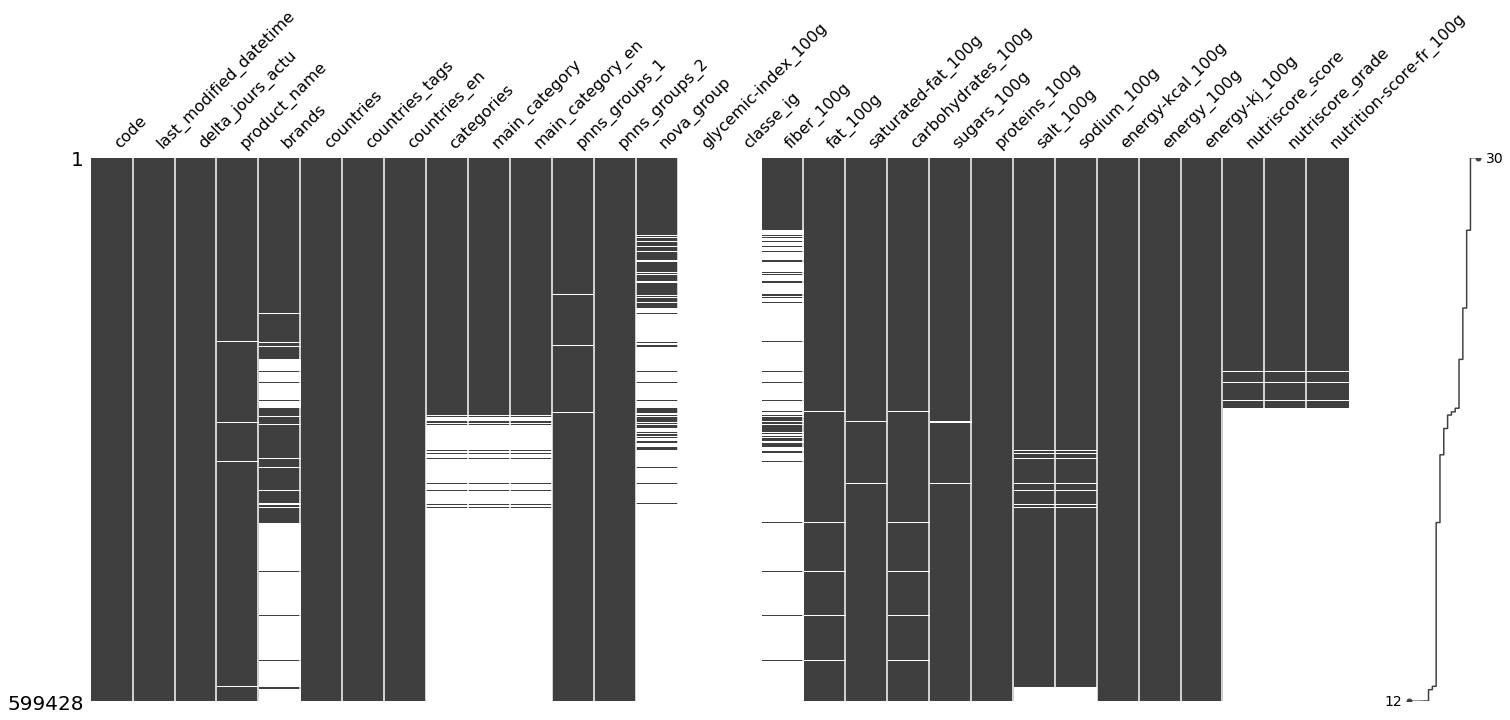

In [65]:
sorted_data = msno.nullity_sort(dataWork, sort='descending')
msno.matrix(sorted_data)

# D - Création du fichier de travail : <a name="D"></a>
On va retirer du fichier d'analyse les variables qui ne nous serviront pas dans l'analyse :
- last_modified_datetime : ne nous sert plus maintenant car on a calculé 'delta_jours_actu' 
- countries, countries_tags, countries_en : ne nous sert plus car on a filtré les produits vendus en France
- categories, main_category, main_category_en : il y a beaucoup de données manquantes nous allons préferer analyser les groupes PNNS
- sodium_100g : car 'salt_100g' nous suffit ici
- energy_100g, energy-kj_100g : car 'energy-kcal_100g' nous suffit
- nutrition-score-fr_100g : car c'est un doublon de nutrition_score

In [66]:
dataClean = dataWork
dataClean = dataClean.drop(columns=['last_modified_datetime','countries','countries_tags','countries_en','categories','main_category',
                                    'main_category_en','sodium_100g','energy_100g','energy-kj_100g','nutrition-score-fr_100g'])

Une fois les traitements de nettoyage effectués on peut maintenant exporter ce dataframe en fichier .csv qui nous servira de fichier de base pour les analyses :

In [69]:
dataClean.to_csv(r'Data\data_clean.csv', index = False)